<a href="https://colab.research.google.com/github/anmolharsh09/DEEP-SEQUENTIAL-CNN-MODEL-FOR-ENHANCED-EYE-DISEASE-DETECTION-AND-CLASSIFICATION/blob/main/Another_copy_of_eyedisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

# New Section

In [ ]:

from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download gunavenkatdoddi/eye-diseases-classification

Saving kaggle (1).json to kaggle (1).json
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip eye-diseases-classification.zip

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# data_dir='drive/My Drive/eyedisease'

Mounted at /content/drive


In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd

import numpy as np

import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_height,img_width=180,180
batch_size=128


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.25,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'  # Use categorical labels
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.25,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'  # Use categorical labels
)

Found 8000 files belonging to 4 classes.
Using 6000 files for training.
Found 8000 files belonging to 4 classes.
Using 2000 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


In [ ]:
num_classes = 4

In [ ]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Use 'softmax' for categorical labels
])




In [ ]:


model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy
              metrics=['accuracy'])

In [ ]:

# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
#fit the model
epochs=30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30
47/47 [==============================] - 786s 14s/step - loss: 1.1678 - accuracy: 0.4658 - val_loss: 0.9845 - val_accuracy: 0.6200
Epoch 2/30
47/47 [==============================] - 58s 1s/step - loss: 0.8757 - accuracy: 0.6362 - val_loss: 0.7709 - val_accuracy: 0.6740
Epoch 3/30
47/47 [==============================] - 65s 1s/step - loss: 0.7206 - accuracy: 0.7082 - val_loss: 0.6134 - val_accuracy: 0.7700
Epoch 4/30
47/47 [==============================] - 56s 1s/step - loss: 0.5711 - accuracy: 0.7768 - val_loss: 0.5765 - val_accuracy: 0.7580
Epoch 5/30
47/47 [==============================] - 58s 1s/step - loss: 0.5040 - accuracy: 0.8013 - val_loss: 0.5686 - val_accuracy: 0.7660
Epoch 6/30
47/47 [==============================] - 55s 1s/step - loss: 0.4306 - accuracy: 0.8330 - val_loss: 0.4419 - val_accuracy: 0.8200
Epoch 7/30
47/47 [==============================] - 59s 1s/step - loss: 0.4008 - accuracy: 0.8427 - val_loss: 0.4599 - val_accuracy: 0.8185
Epoch 8/30
47/47 [

In [ ]:
#finally save the model
import tensorflow as tf
tf.keras.models.save_model(model,'eye.hdf5')
model.save("eyemodel.hdf5")

<ipython-input-15-95fd3f02b2ab>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'eye.hdf5')
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

from matplotlib import pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

filepath = './eye.hdf5'
model = load_model(filepath)
print(model)

print("Model Loaded Successfully")

Model Loaded Successfully


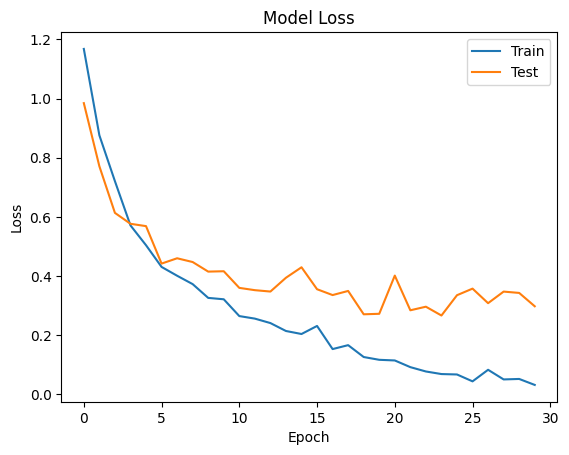

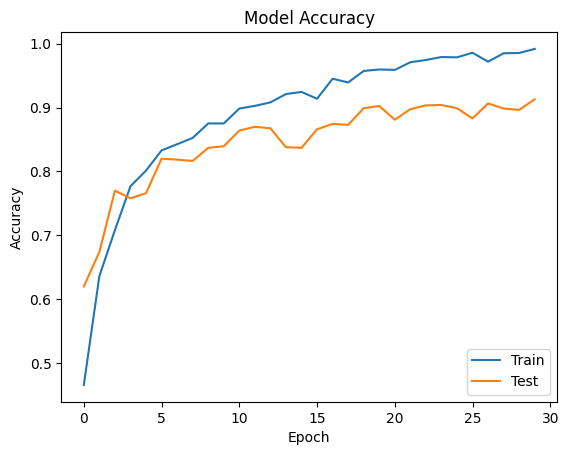

In [ ]:
def plot_loss(history):
    # Plot training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower right')
    plt.show()
plot_loss(history)
plot_accuracy(history)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix




In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model
model = load_model('eye.hdf5')

# Get the class names
class_names = train_ds.class_names

# Initialize variables to store class-wise counts
class_counts = {class_name: 0 for class_name in class_names}
class_correct_counts = {class_name: 0 for class_name in class_names}

# Iterate over the validation dataset to calculate class-level accuracy
for images, labels in val_ds:
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)
    true_classes = tf.argmax(labels, axis=1)

    for i in range(len(class_names)):
        class_name = class_names[i]
        class_counts[class_name] += tf.reduce_sum(tf.cast(true_classes == i, tf.int32))
        class_correct_counts[class_name] += tf.reduce_sum(tf.cast(tf.logical_and(true_classes == i, true_classes == predicted_classes), tf.int32))

# Calculate and print class-level accuracy
print('Class-level accuracy:')
for class_name in class_names:
    accuracy = class_correct_counts[class_name] / class_counts[class_name]
    print(f'{class_name}: {accuracy.numpy():.4f}')


3/3 [==============================] - 0s 76ms/step
Class-level accuracy:
cataract: 0.9188
diabetic_retinopathy: 0.9724
glaucoma: 0.8887
normal: 0.8702


1/1 [==============================] - 0s 55ms/step


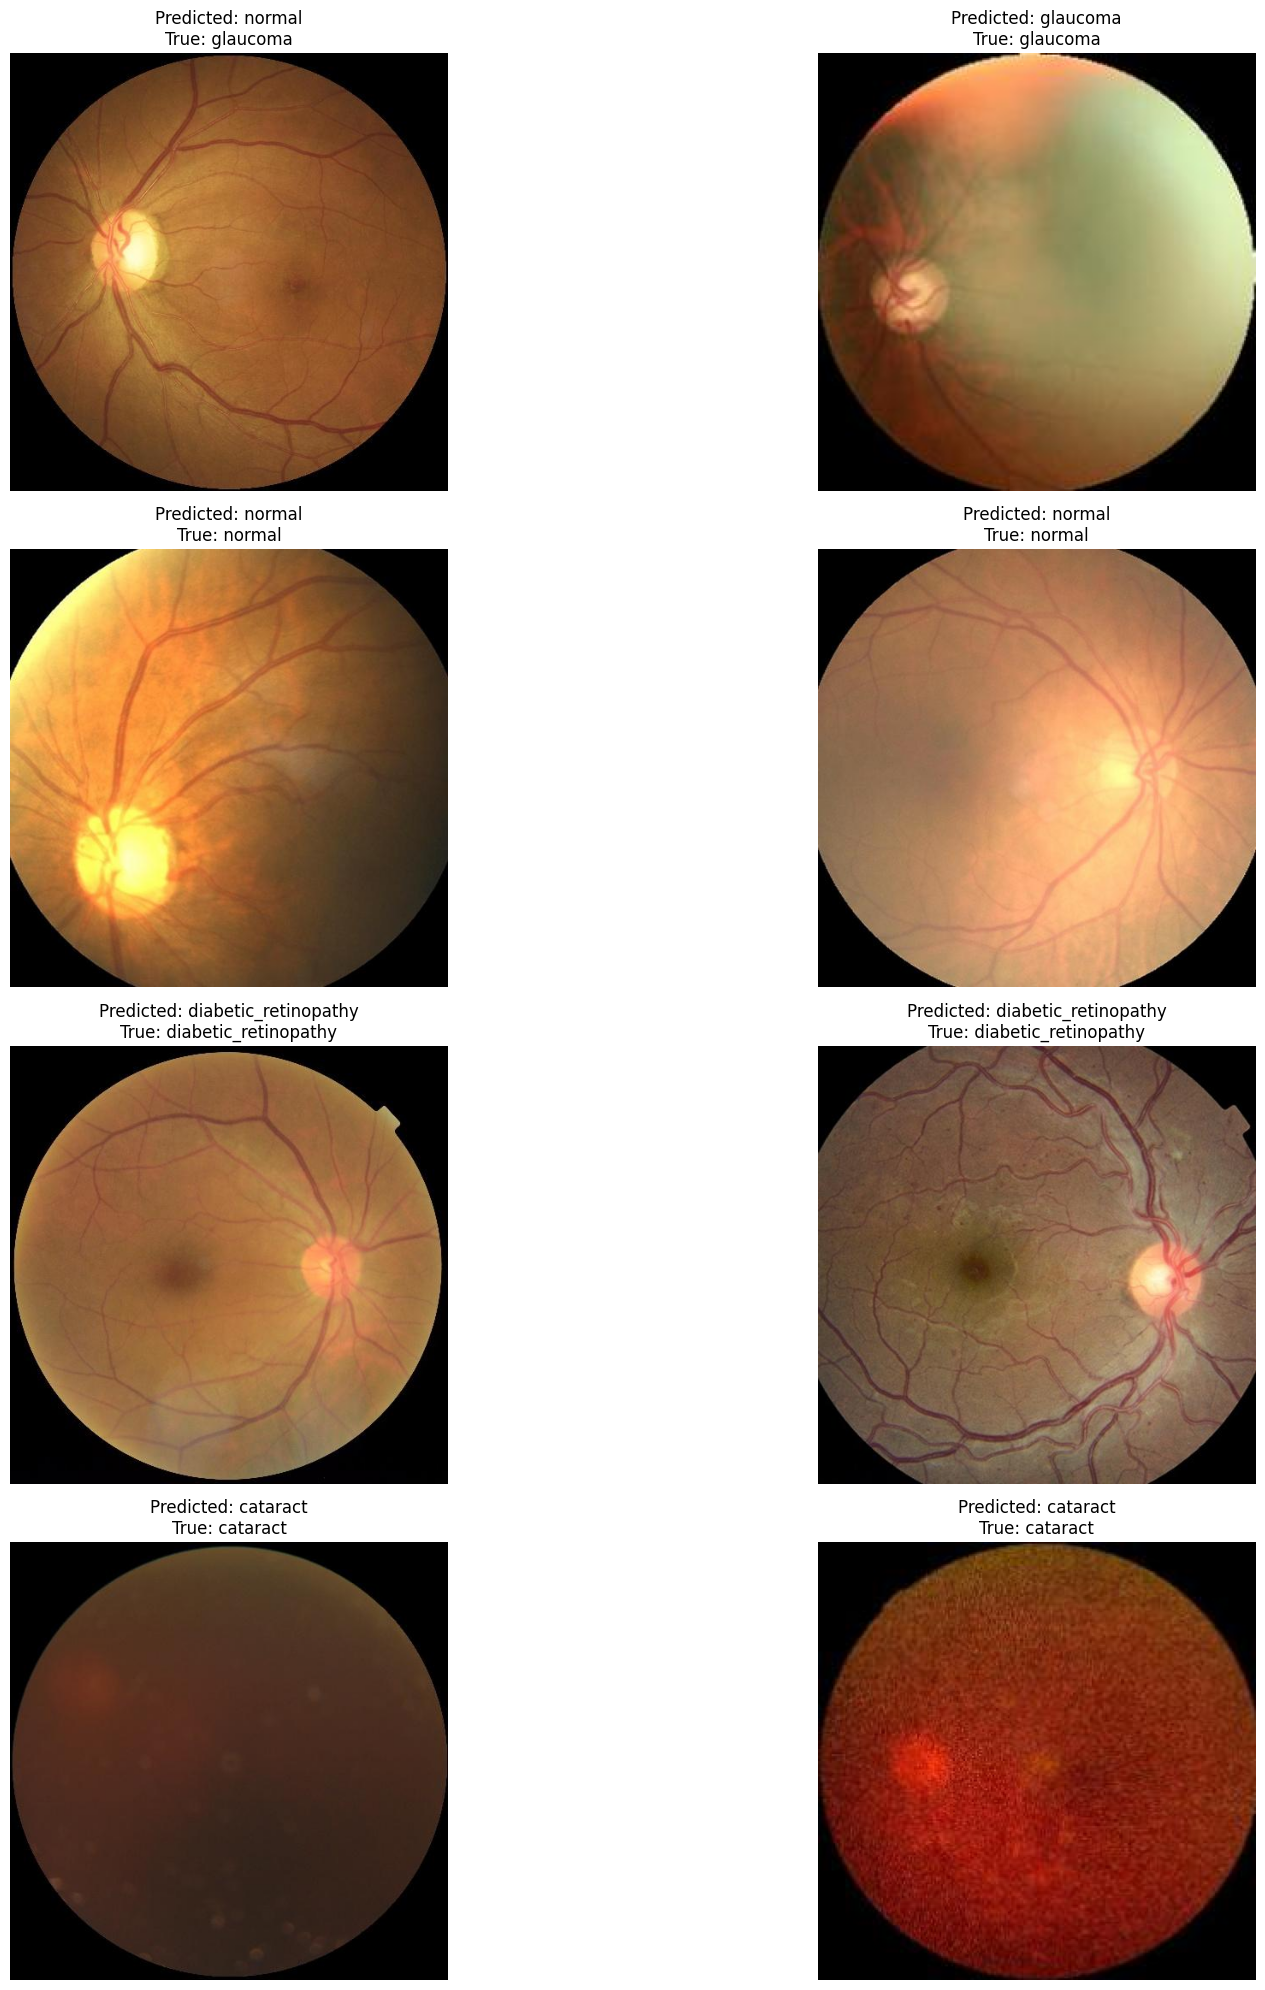

In [ ]:
import os
import random


def predict(test_img_path, true_class_name):
    test_image = load_img(test_img_path, target_size=(180, 180))
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    result = model.predict(test_image)
    pred = np.argmax(result, axis=1)[0]
    expression = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

    test_image = plt.imread(test_img_path)
    return test_image, expression[pred], true_class_name


class_directories = os.listdir(data_dir)

num_images_to_select = 2
fig, axes = plt.subplots(len(class_directories), num_images_to_select, figsize=(20, 20))

for i, class_dir in enumerate(class_directories):
    class_path = os.path.join(data_dir, class_dir)
    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)
        random_images = random.sample(image_files, num_images_to_select)
        for j, image_file in enumerate(random_images):
            image_path = os.path.join(class_path, image_file)
            test_image, predicted_class, true_class = predict(image_path, class_dir)

            axes[i, j].imshow(test_image)
            axes[i, j].axis('off')
            axes[i, j].set_title(f"Predicted: {predicted_class}\nTrue: {true_class}")

plt.tight_layout()
plt.show()



In [ ]:
history_df = pd.DataFrame(history.history)
history_df.to_csv("history.csv")
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
25,0.043694,0.985833,0.357252,0.8830
26,0.082823,0.971833,0.308056,0.9065
27,0.050213,0.985000,0.347222,0.8985
28,0.051818,0.985500,0.342703,0.8965
29,0.031641,0.991833,0.297583,0.9130
